In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [112]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [113]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [114]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [115]:
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [116]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [117]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [118]:
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())
print(df['stroke'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


In [119]:
df.drop(['work_type'], axis=1, inplace=True) #İş tipi versinin çoğunluğu Private olduğu için veri setinden çıkarıyoruz.

In [120]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,0,202.21,28.7,2,1
2,1,80.0,0,1,1,0,105.92,32.5,2,1
3,0,49.0,0,0,1,1,171.23,34.4,3,1
4,0,79.0,1,0,1,0,174.12,24.0,2,1


In [121]:
print(df['gender'].value_counts())
print(df['ever_married'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

0    2994
1    2115
2       1
Name: gender, dtype: int64
1    3353
0    1757
Name: ever_married, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64


In [ ]:
## Data Visualizition

In [122]:
target_count = df['stroke'].value_counts().reset_index()
target_count

,index,stroke
0,0,4861
1,1,249


<Axes: xlabel='index', ylabel='stroke'>

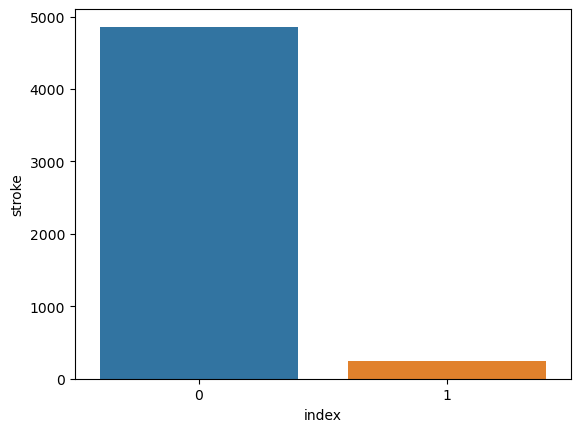

In [123]:
sns.barplot(data=target_count, x='index', y='stroke')

In [124]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,-0.006738,0.055180,-0.026316,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,0.014180,0.238171,0.325553,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.007913,0.174474,0.159733,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,0.003092,0.161857,0.038417,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,0.006261,0.155068,0.335524,0.259647,0.108340
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,1.000000,-0.004946,-0.000158,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.004946,1.000000,0.168301,0.063437,0.131945
bmi,-0.026316,0.325553,0.159733,0.038417,0.335524,-0.000158,0.168301,1.000000,0.219112,0.038257
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,0.008237,0.063437,0.219112,1.000000,0.028123
stroke,0.008929,0.245257,0.127904,0.134914,0.108340,0.015458,0.131945,0.038257,0.028123,1.000000


<Axes: >

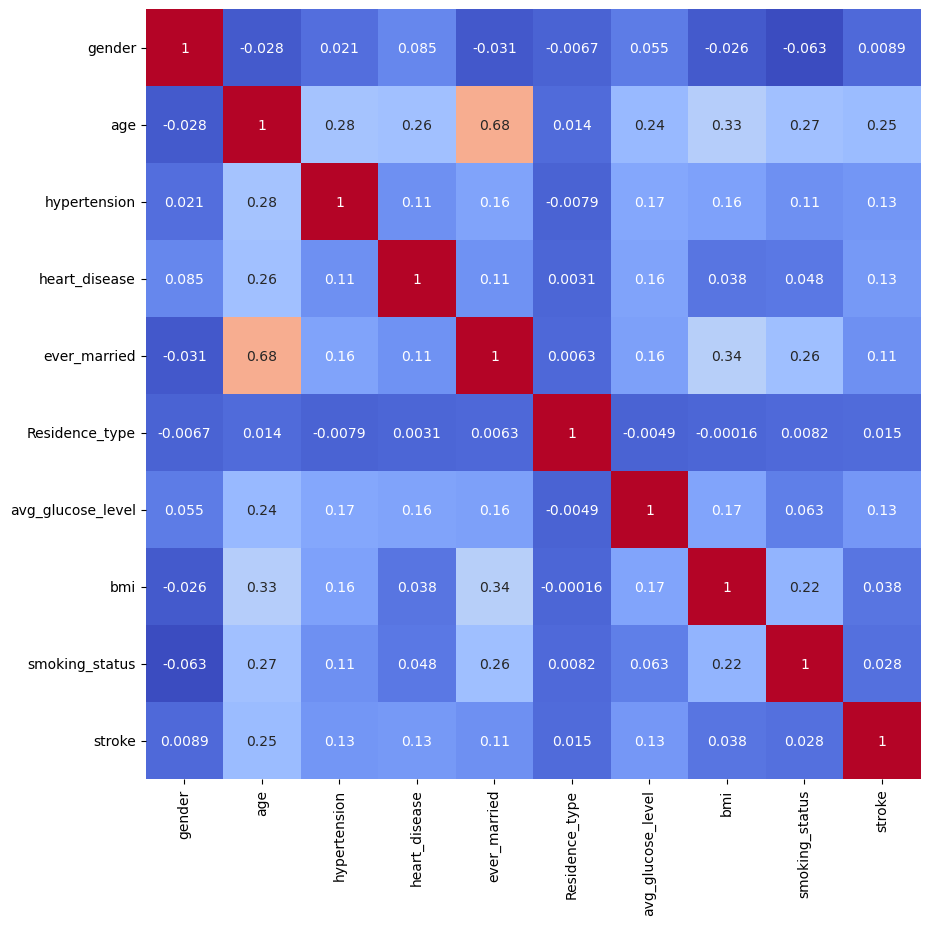

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=False)

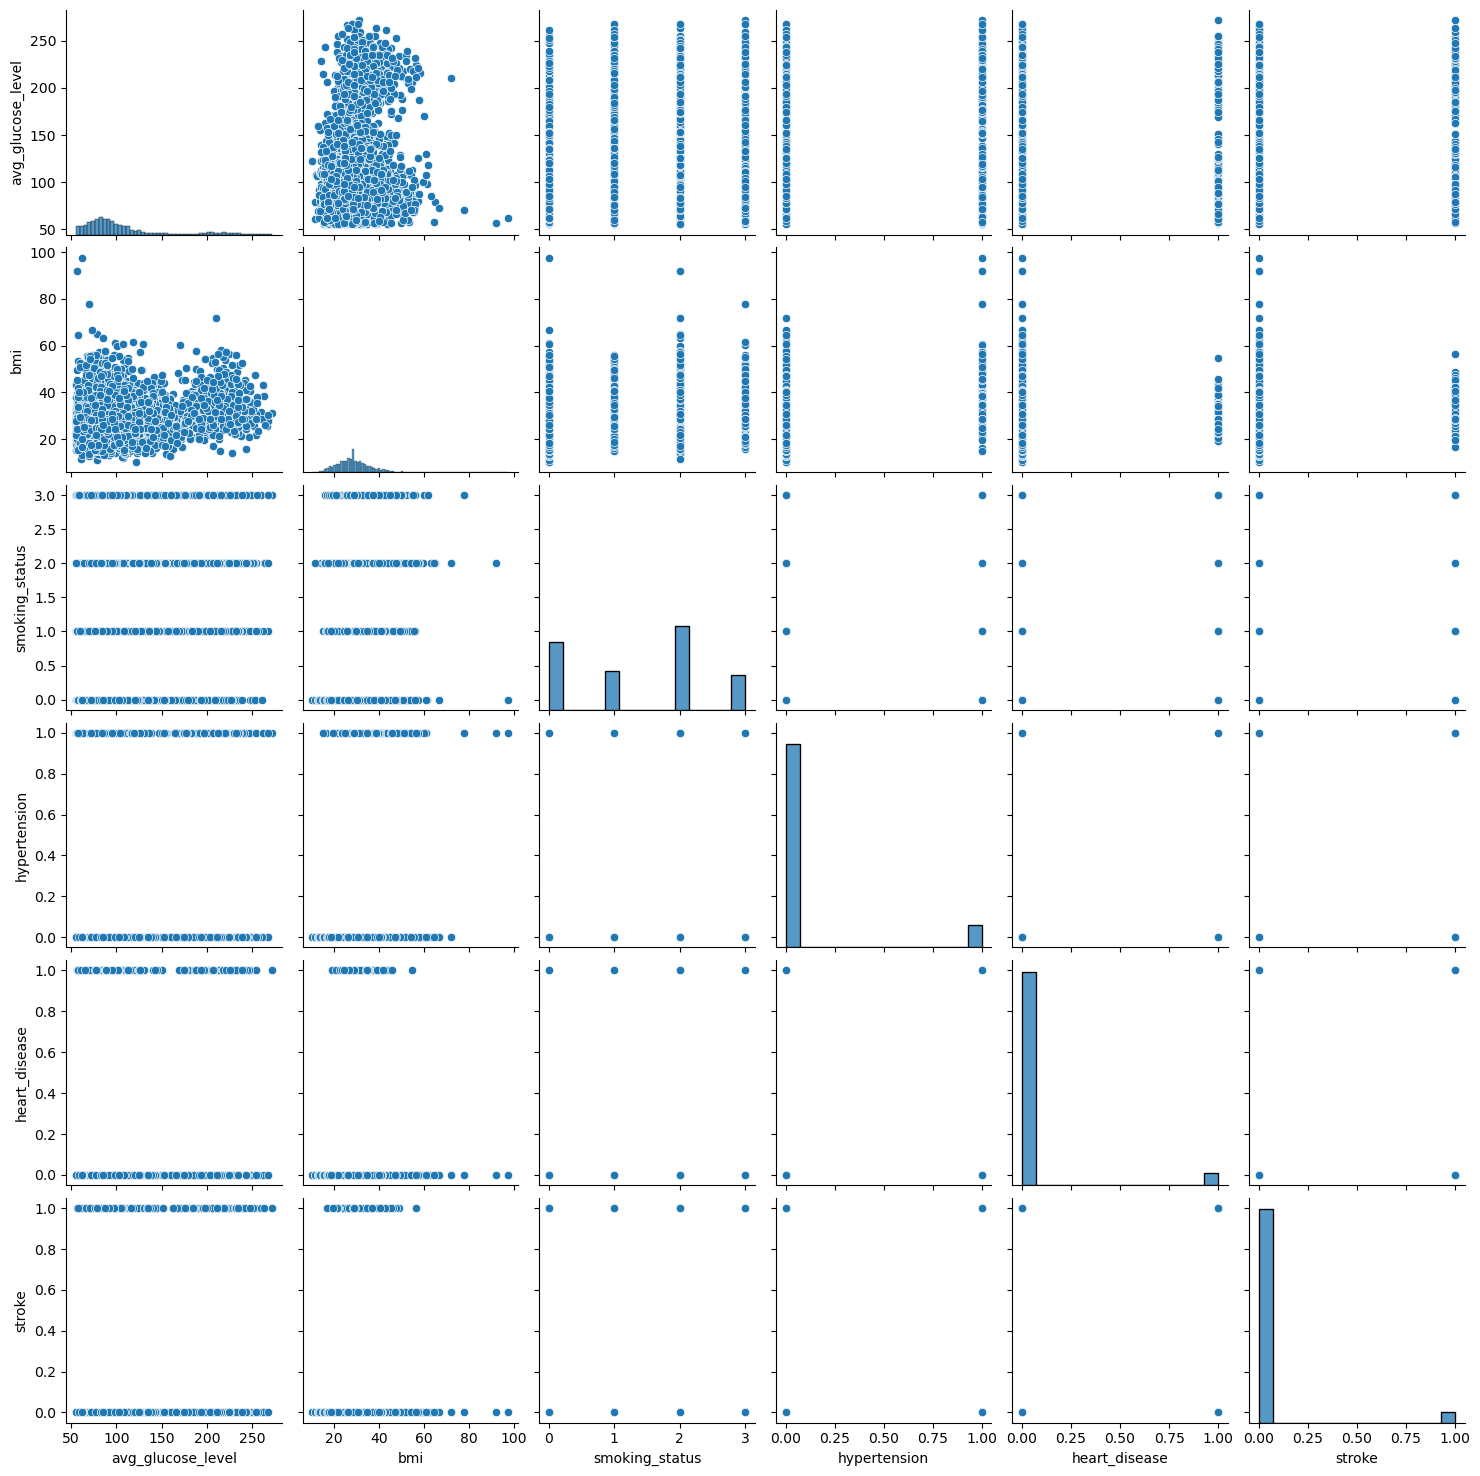

In [126]:
sns.pairplot(df, diag_kind='hist', vars=['avg_glucose_level','bmi','smoking_status','hypertension','heart_disease', 'stroke'])

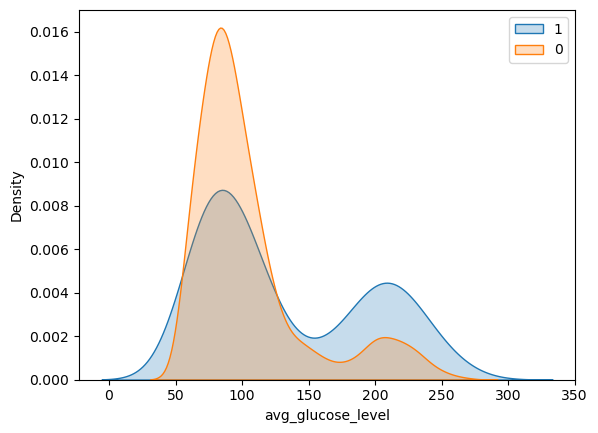

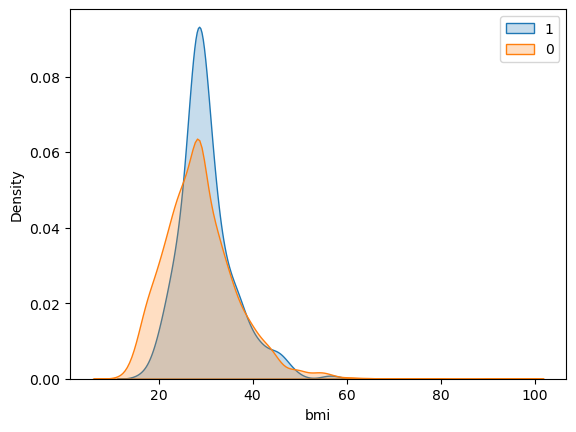

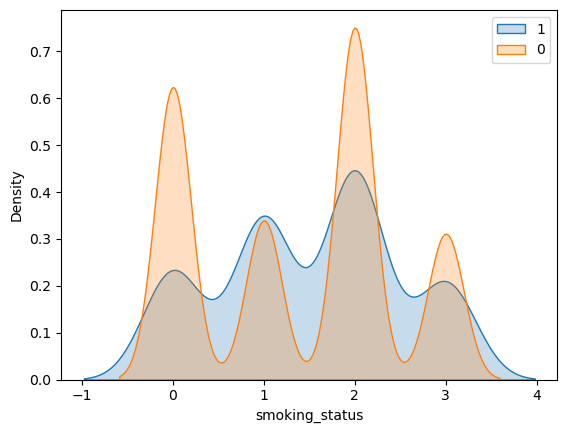

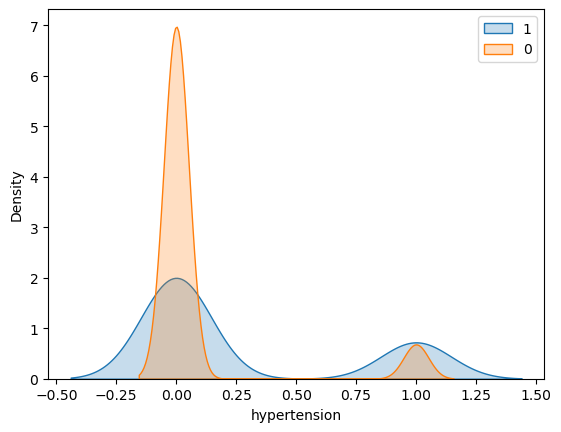

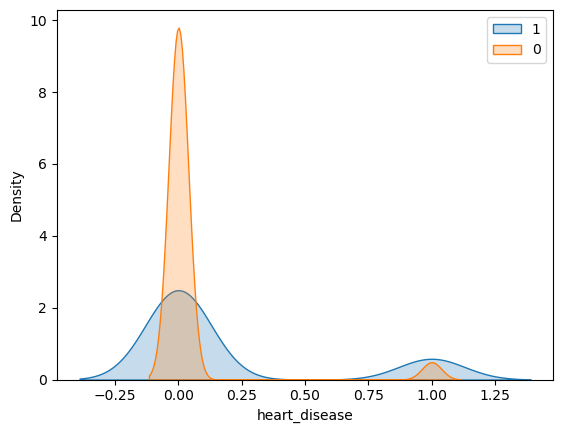

In [127]:
vars_ = ['avg_glucose_level','bmi','smoking_status','hypertension','heart_disease']
for col in vars_:
    for spec in df['stroke'].unique():
        sns.kdeplot(df[df['stroke']==spec][col], legend=True, label=spec, fill=True)
        plt.legend()
    plt.show()    

In [128]:
## Machine Learning

In [129]:
%pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
